# GANs Image Generation

In this notebook, we will explore how Generative Adversarial Networks (GANs) generate images. We will use a pretrained GAN model (BigGAN) to generate images from random noise.

## Instructions
1. Run the code below to generate an image from random noise.
2. Modify the latent vector to generate different images.
3. Experiment with generating different images by altering the latent vector and visualizing the results.


In [34]:
import torch
from pytorch_pretrained_biggan import BigGAN, one_hot_from_int, truncated_noise_sample
from torchvision import transforms
from PIL import Image

# Load the pretrained BigGAN-deep-256 model
model = BigGAN.from_pretrained('biggan-deep-256')   # downloads weights if needed
model.eval()                                       # inference mode


BigGAN(
  (embeddings): Linear(in_features=1000, out_features=128, bias=False)
  (generator): Generator(
    (gen_z): Linear(in_features=256, out_features=32768, bias=True)
    (layers): ModuleList(
      (0-2): 3 x GenBlock(
        (bn_0): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=2048, bias=False)
          (offset): Linear(in_features=256, out_features=2048, bias=False)
        )
        (conv_0): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1))
        (bn_1): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=512, bias=False)
          (offset): Linear(in_features=256, out_features=512, bias=False)
        )
        (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_2): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=512, bias=False)
          (offset): Linear(in_features=256, out_features=512, bias=False)
        )
        (conv_2): Conv2d(512, 512, kernel_siz

In [39]:
#  • Choose your truncation ψ (0.3 – 1.0) and an ImageNet class index (0–999)
truncation = 0.4
class_idx  = 153   # e.g. “Persian cat”

#  • Sample noise and class vectors
noise_np   = truncated_noise_sample(truncation=truncation, batch_size=1)
class_np   = one_hot_from_int([class_idx], batch_size=1)
noise      = torch.from_numpy(noise_np)
class_vec  = torch.from_numpy(class_np)

#  • Generate (no gradients needed)
with torch.no_grad():
    output = model(noise, class_vec, truncation)  # ⇒ tensor in [–1,+1]

#  • Post-process → PIL
img_tensor = output.squeeze(0).clamp(-1,1).add(1).div(2)  # map to [0,1]
pil_img    = transforms.ToPILImage()(img_tensor.cpu())

#  • Display
pil_img.show()


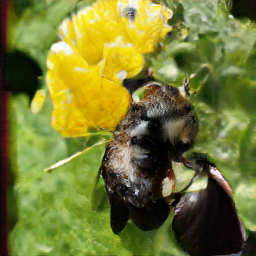

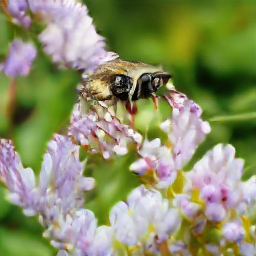

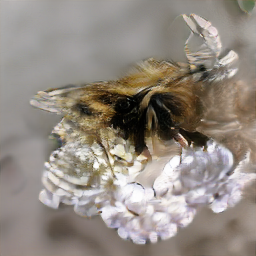

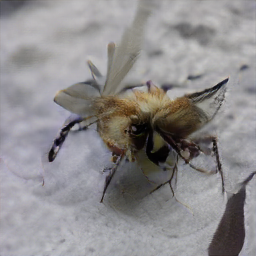

In [ ]:
# Try several random seeds to see diversity
truncation = 1.0
class_idx  = 817

for seed in [0, 42, 123, 999]:
    # a) sample truncated noise (seed controls RNG only if you set it inside the helper)
    noise_np = truncated_noise_sample(truncation=truncation, batch_size=1)
    noise    = torch.from_numpy(noise_np)

    # b) class conditioning
    class_np  = one_hot_from_int([class_idx], batch_size=1)
    class_vec = torch.from_numpy(class_np)

    # c) inference
    with torch.no_grad():
        out = model(noise, class_vec, truncation)

    # d) post-process
    img_t = out.squeeze(0).clamp(-1,1).add(1).div(2)
    pil   = transforms.ToPILImage()(img_t.cpu())

    # e) show
    display(pil)  # in Jupyter, use display() to inline multiple


## Reflection

Now that you have generated images, write a brief report reflecting on your observations:

1. How did the generated images change when you modified the latent vector?
2. What patterns did you notice in the generated images? Were they realistic?
3. How does the process of generating images from noise differ from traditional image generation methods?
4. What challenges or limitations did you observe with the GAN model?